# Réseau de neurones artificiel Feed Forward : Classification Multiclasses

 

Exemple simple de classification multiclasses par réseau de neurones, sur les données MNIST, avec PyTorch. 

[REQUIREMENTS.txt](#requirements)

In [1]:
# --- Imports

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --- Torchvision : charger les données
train_dataset = torchvision.datasets.MNIST(
    root='../tmp',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

test_dataset = torchvision.datasets.MNIST(
    root='../tmp',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100.0%


Extracting ../tmp\MNIST\raw\train-images-idx3-ubyte.gz to ../tmp\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100.0%


Extracting ../tmp\MNIST\raw\train-labels-idx1-ubyte.gz to ../tmp\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100.0%


Extracting ../tmp\MNIST\raw\t10k-images-idx3-ubyte.gz to ../tmp\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100.0%

Extracting ../tmp\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../tmp\MNIST\raw



In [3]:
print('Shape du jeu d''entrainement:', train_dataset.data.shape)
print('Target du jeu d''entrainement: ', train_dataset.targets)

Shape du jeu dentrainement: torch.Size([60000, 28, 28])
Target du jeu dentrainement:  tensor([5, 0, 4,  ..., 5, 6, 8])


In [4]:
print('Shape du jeu de test:', test_dataset.data.shape)
print('Target du jeu de test: ', test_dataset.targets)

Shape du jeu de test: torch.Size([10000, 28, 28])
Target du jeu de test:  tensor([7, 2, 1,  ..., 4, 5, 6])


In [5]:
# --- Création du modèle ANN

model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [6]:
# --- GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

model.to(device)

cuda:0


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [7]:
# --- Entraîner le modèle

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# Dataloader les batchs
batch_size = 128
train_loader = torch.utils.data.DataLoader(
    dataset = train_dataset,
    batch_size = batch_size,
    shuffle = True
)

test_loader = torch.utils.data.DataLoader(
    dataset = test_dataset,
    batch_size = batch_size,
    shuffle = False
)


In [8]:
# boucle d'entraînement
n_epochs = 10
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_accuracy = np.zeros(n_epochs)
test_accuracy = np.zeros(n_epochs)

for it in range(n_epochs):
    train_loss_epoch = []
    train_n_correct = train_n_total = 0
    test_loss_epoch = []
    test_n_correct = test_n_total = 0

    # boucle d'entraînement
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        inputs = inputs.view(-1, 784)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, targets)
        acc = (targets == torch.max(outputs, 1)[1])
    
        loss.backward()
        optimizer.step()

        train_loss_epoch.append(loss.item())
        train_n_correct += acc.sum().item()
        train_n_total += targets.shape[0]
    
    train_loss_epoch = np.mean(train_loss_epoch)
    train_accuracy_epoch = train_n_correct/train_n_total

    # boucle de test
    for inputs_test, targets_test in test_loader:
        inputs_test, targets_test= inputs_test.to(device), targets_test.to(device)
        inputs_test = inputs_test.view(-1, 784)

        outputs_test = model(inputs_test)
        loss_test = criterion(outputs_test, targets_test)
        acc_test = (targets_test == torch.max(outputs_test, 1)[1])

        test_loss_epoch.append(loss_test.item())
        test_n_correct += acc_test.sum().item()
        test_n_total += targets_test.shape[0]
    
    test_loss_epoch = np.mean(test_loss_epoch)
    test_accuracy_epoch = test_n_correct/test_n_total


    # loss par epoch
    train_losses[it] = train_loss_epoch
    test_losses[it] = test_loss_epoch

    # accuracy par epoch
    train_accuracy[it] = train_accuracy_epoch
    test_accuracy[it] = test_accuracy_epoch

    print(f'''Epoch {it+1}/{n_epochs}, 
            Train Loss|accuracy: {train_loss_epoch:.4f} | {train_accuracy_epoch:.4f},
            Test Loss|accuracy: {test_loss_epoch:.4f} | {test_accuracy_epoch:.4f}''')


Epoch 1/10, 
            Train Loss|accuracy: 0.4145 | 0.8917,
            Test Loss|accuracy: 0.2329 | 0.9316
Epoch 2/10, 
            Train Loss|accuracy: 0.1919 | 0.9458,
            Test Loss|accuracy: 0.1540 | 0.9532
Epoch 3/10, 
            Train Loss|accuracy: 0.1351 | 0.9619,
            Test Loss|accuracy: 0.1234 | 0.9623
Epoch 4/10, 
            Train Loss|accuracy: 0.1048 | 0.9689,
            Test Loss|accuracy: 0.1024 | 0.9699
Epoch 5/10, 
            Train Loss|accuracy: 0.0848 | 0.9756,
            Test Loss|accuracy: 0.0873 | 0.9740
Epoch 6/10, 
            Train Loss|accuracy: 0.0699 | 0.9794,
            Test Loss|accuracy: 0.0843 | 0.9747
Epoch 7/10, 
            Train Loss|accuracy: 0.0587 | 0.9824,
            Test Loss|accuracy: 0.0783 | 0.9779
Epoch 8/10, 
            Train Loss|accuracy: 0.0491 | 0.9855,
            Test Loss|accuracy: 0.0828 | 0.9758
Epoch 9/10, 
            Train Loss|accuracy: 0.0419 | 0.9878,
            Test Loss|accuracy: 0.0758 | 0.9782
E

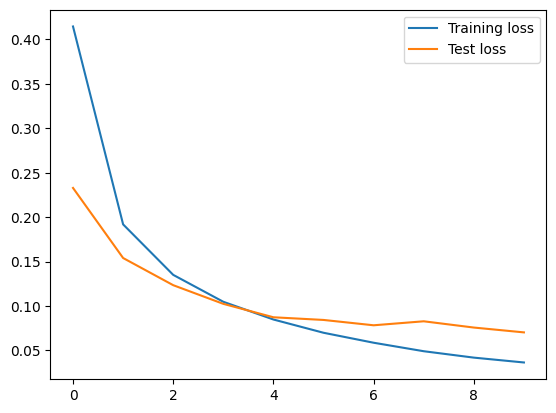

In [9]:
# Loss par itération
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.legend()
plt.show()

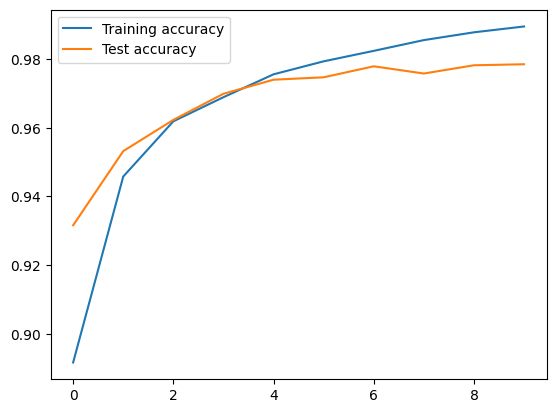

In [10]:
# Accuracy par itération
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(test_accuracy, label='Test accuracy')
plt.legend()
plt.show()

In [12]:
# --- Evaluer le modèle

# Train
train_n_correct = train_n_total = 0
for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 784)

    outputs = model(inputs)
    _, predictions = torch.max(outputs, 1)
    
    train_n_correct += (predictions == targets).sum().item()
    train_n_total += targets.shape[0]


# Test
x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
pred_test = np.array([])

test_n_correct = test_n_total = 0
for inputs_test, targets_test in test_loader:
    inputs_test, targets_test = inputs_test.to(device), targets_test.to(device)
    inputs_test = inputs_test.view(-1, 784)

    outputs_test = model(inputs_test)
    _, predictions_test = torch.max(outputs_test, 1)
    
    test_n_correct += (predictions_test == targets_test).sum().item()
    test_n_total += targets_test.shape[0]

    pred_test = np.concatenate((pred_test, predictions_test.cpu().numpy()))

print('Train accuracy : ', train_n_correct/train_n_total)
print('Test accuracy : ', test_n_correct/test_n_total)


Train accuracy :  0.9928666666666667
Test accuracy :  0.9785


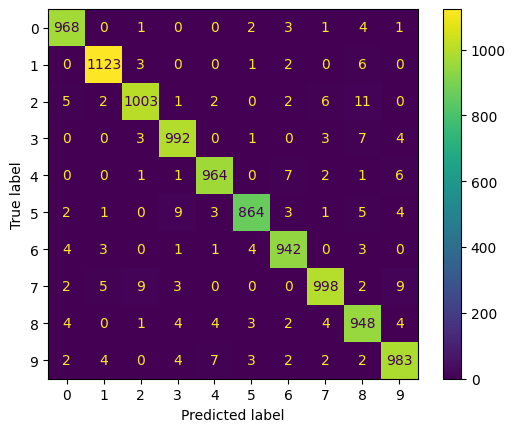

In [13]:
# --- Matrice de confusion

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, pred_test)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=torch.unique(train_dataset.targets).numpy())

cm_display.plot()
plt.show()

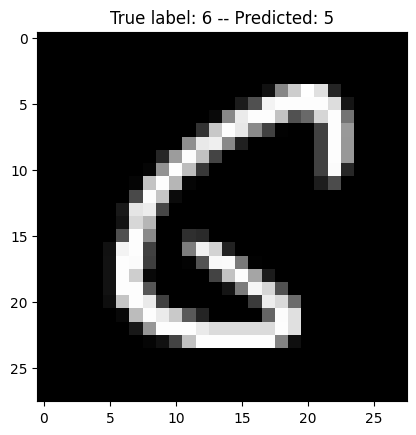

In [18]:
# --- Exemples de mauvaise prédiction

missclassified_idx = np.where(pred_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f'True label: {y_test[i]} -- Predicted: {int(pred_test[i])}')
plt.show()

## <a id="requirements" style="color:black">REQUIREMENTS.txt</a>

<span style="color:orange">Ce notebook a été créé avec python 3.10</span>

Requirements.txt  

```
alembic==1.13.2
aniso8601==9.0.1
anyio==4.4.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.2.0
Babel==2.15.0
bcrypt==4.1.3
beautifulsoup4==4.12.3      
bleach==6.1.0
blinker==1.8.2
boto3==1.35.35
botocore==1.35.40
cachetools==5.4.0
certifi==2024.6.2
cffi==1.16.0
charset-normalizer==3.3.2   
click==8.1.7
cloudpickle==3.0.0
colorama==0.4.6
comm==0.2.2
contourpy==1.2.1
cryptography==42.0.8        
cycler==0.12.1
databricks-sdk==0.31.1      
debugpy==1.8.1
decorator==5.1.1
defusedxml==0.7.1
Deprecated==1.2.14
docker==7.1.0
entrypoints==0.4
exceptiongroup==1.2.1
executing==2.0.1
fastjsonschema==2.19.1
filelock==3.13.1
Flask==3.0.3
fonttools==4.53.0
fqdn==1.5.1
fsspec==2024.2.0
gitdb==4.0.11
GitPython==3.1.43
google-auth==2.34.0
graphene==3.3
graphql-core==3.2.3
graphql-relay==3.2.0
greenlet==3.0.3
h11==0.14.0
httpcore==1.0.5
httpx==0.27.0
idna==3.7
imageio==2.35.1
importlib_metadata==7.1.0
intel-openmp==2021.4.0
ipykernel==6.29.4
ipython==8.25.0
ipywidgets==8.1.3
isoduration==20.11.0
itsdangerous==2.2.0
jedi==0.19.1
Jinja2==3.1.3
jmespath==1.0.1
joblib==1.4.2
json5==0.9.25
jsonpointer==3.0.0
jsonschema==4.22.0
jsonschema-specifications==2023.12.1
jupyter==1.0.0
jupyter-console==6.6.3
jupyter-events==0.10.0
jupyter-lsp==2.2.5
jupyter_client==8.6.2
jupyter_core==5.7.2
jupyter_server==2.14.1
jupyter_server_terminals==0.5.3
jupyterlab==4.2.2
jupyterlab_pygments==0.3.0
jupyterlab_server==2.27.2
jupyterlab_widgets==3.0.11
kiwisolver==1.4.5
lazy_loader==0.4
Mako==1.3.5
Markdown==3.6
MarkupSafe==2.1.5
matplotlib==3.9.0
matplotlib-inline==0.1.7
mistune==3.0.2
mkl==2021.4.0
mlflow==2.15.1
mlflow-skinny==2.15.1
mpmath==1.3.0
nbclient==0.10.0
nbconvert==7.16.4
nbformat==5.10.4
nest-asyncio==1.6.0
networkx==3.2.1
notebook==7.2.1
notebook_shim==0.2.4
numpy==1.26.3
opentelemetry-api==1.25.0
opentelemetry-sdk==1.25.0
opentelemetry-semantic-conventions==0.46b0
overrides==7.7.0
packaging==24.1
pandas==2.2.2
pandocfilters==1.5.1
paramiko==3.4.0
parso==0.8.4
pillow==10.2.0
platformdirs==4.2.2
prometheus_client==0.20.0
prompt_toolkit==3.0.47
protobuf==5.28.2
psutil==5.9.8
pure-eval==0.2.2
pyarrow==15.0.2
pyasn1==0.6.0
pyasn1_modules==0.4.0
pycparser==2.22
Pygments==2.18.0
PyNaCl==1.5.0
pyparsing==3.1.2
pysftp==0.2.8
python-dateutil==2.9.0.post0
python-json-logger==2.0.7
pytz==2024.1
pywin32==306
pywinpty==2.0.13
PyYAML==6.0.1
pyzmq==26.0.3
qtconsole==5.5.2
QtPy==2.4.1
querystring-parser==1.2.4
referencing==0.35.1
requests==2.32.3
rfc3339-validator==0.1.4
rfc3986-validator==0.1.1
rpds-py==0.18.1
rsa==4.9
s3transfer==0.10.3
scikit-image==0.24.0
scikit-learn==1.5.1
scipy==1.14.0
Send2Trash==1.8.3
six==1.16.0
smmap==5.0.1
sniffio==1.3.1
soupsieve==2.5
SQLAlchemy==2.0.31
sqlparse==0.5.1
stack-data==0.6.3
sympy==1.12
tbb==2021.11.0
terminado==0.18.1
threadpoolctl==3.5.0
tifffile==2024.9.20
tinycss2==1.3.0
tomli==2.0.1
torch==2.3.1+cu121
torchaudio==2.3.1+cu121
torchvision==0.18.1+cu121
tornado==6.4.1
traitlets==5.14.3
types-python-dateutil==2.9.0.20240316
typing_extensions==4.9.0
tzdata==2024.1
uri-template==1.3.0
urllib3==2.2.1
waitress==3.0.0
wcwidth==0.2.13
webcolors==24.6.0
webencodings==0.5.1
websocket-client==1.8.0
Werkzeug==3.0.3
widgetsnbextension==4.0.11
wrapt==1.16.0
zipp==3.19.2
```